# week 1

In [4]:
import pandas as pd

def load_data(filename):
    """Load training data from CSV file"""
    data = pd.read_csv(filename)
    return data

def find_s_algorithm(data):
    """Find the most specific hypothesis using FIND-S algorithm"""
    # Extract features and target column
    attributes = data.iloc[:, :-1].values
    target = data.iloc[:, -1].values

    # Initialize hypothesis with the first positive example
    for i in range(len(target)):
        if target[i] == "Yes":  # Assuming 'Yes' is the positive class
            hypothesis = attributes[i].copy()
            break

    # Update hypothesis based on other positive examples
    for i in range(len(target)):
        if target[i] == "Yes":
            for j in range(len(hypothesis)):
                if hypothesis[j] != attributes[i][j]:
                    hypothesis[j] = '?'

    return hypothesis

# Load data from CSV file
filename = "training_data.csv"  # Change this to your actual file path
data = load_data("week1.csv")

# Apply FIND-S algorithm
specific_hypothesis = find_s_algorithm(data)

print("Final Most Specific Hypothesis:", specific_hypothesis)


Final Most Specific Hypothesis: ['Sunny' 'Warm' '?' 'Strong' '?' '?']


In [6]:
import csv

# Define attributes
attributes = [["Sunny", "Rainy"], ["Warm", "Cold"], ["Normal", "High"],
              ["Strong", "Weak"], ["Warm", "Cool"], ["Same", "Change"]]
num_attributes = len(attributes)

# Print initial hypotheses
print("The most general hypothesis: ['?', '?', '?', '?', '?', '?']")
print("The most specific hypothesis: ['0', '0', '0', '0', '0', '0']")

# Read dataset from CSV
data = []
print("\nThe given training dataset:")
with open("week1.csv", "r") as csvFile:  # Ensure the file exists in the correct directory
    reader = csv.reader(csvFile)
    for row in reader:
        data.append(row)
        print(row)

# Initialize the hypothesis with the first positive example
for row in data:
    if row[-1].strip().lower() == "yes":  # Case-insensitive check for "yes"
        hypothesis = row[:-1]  # Exclude last column (target)
        break  # Use first positive example only

print("\nFIND-S: Finding a Maximally Specific Hypothesis")

# Process training examples
for i, row in enumerate(data):
    if row[-1].strip().lower() == "yes":  # Only consider positive examples
        for j in range(num_attributes):
            if row[j] != hypothesis[j]:
                hypothesis[j] = '?'  # Generalize hypothesis
    print(f"For training example {i+1}, the hypothesis is: {hypothesis}")

# Final hypothesis
print("\nThe Maximally Specific Hypothesis:")
print(hypothesis)


The most general hypothesis: ['?', '?', '?', '?', '?', '?']
The most specific hypothesis: ['0', '0', '0', '0', '0', '0']

The given training dataset:
['Sky', 'Temperature', 'Humidity', 'Wind', 'Water', 'Forecast', 'EnjoySport']
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes']
['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes']
['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No']
['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']
['Rainy', 'Warm', 'High', 'Weak', 'Cool', 'Change', 'No']

FIND-S: Finding a Maximally Specific Hypothesis
For training example 1, the hypothesis is: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
For training example 2, the hypothesis is: ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
For training example 3, the hypothesis is: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
For training example 4, the hypothesis is: ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
For training example 5, the hypothesis is: ['S

# week 2

In [8]:
import numpy as np
import pandas as pd

# Load dataset
data = pd.read_csv("week1.csv")  # Make sure the file is in the correct directory
concepts = np.array(data.iloc[:, :-1])  # Extract features
target = np.array(data.iloc[:, -1])  # Extract target values

print("Concepts (Features):\n", concepts)
print("\nTarget (Labels):\n", target)

def learn(concepts, target):
    specific_h = concepts[0].copy()  # Initialize the most specific hypothesis
    print("\nInitial Specific Hypothesis:", specific_h)

    general_h = [["?" for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    print("Initial General Hypothesis:", general_h)

    for i, instance in enumerate(concepts):
        if target[i].lower() == "yes":  # Positive example
            for x in range(len(specific_h)):
                if instance[x] != specific_h[x]:
                    specific_h[x] = "?"
                    general_h[x][x] = "?"
        elif target[i].lower() == "no":  # Negative example
            for x in range(len(specific_h)):
                if instance[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]  # Specialization step
                else:
                    general_h[x][x] = "?"

        print(f"\nStep {i+1} - Updated Hypotheses:")
        print("Specific Hypothesis:", specific_h)
        print("General Hypothesis:", general_h)

    # Remove redundant general hypotheses
    general_h = [hyp for hyp in general_h if hyp != ["?"] * len(specific_h)]
    
    return specific_h, general_h

# Run Candidate-Elimination Algorithm
s_final, g_final = learn(concepts, target)

print("\nFinal Specific Hypothesis:\n", s_final)
print("Final General Hypothesis:\n", g_final)


Concepts (Features):
 [['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']
 ['Rainy' 'Warm' 'High' 'Weak' 'Cool' 'Change']]

Target (Labels):
 ['Yes' 'Yes' 'No' 'Yes' 'No']

Initial Specific Hypothesis: ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Initial General Hypothesis: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 1 - Updated Hypotheses:
Specific Hypothesis: ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
General Hypothesis: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2 - Updated Hypotheses:
Specific Hypothesis: ['Sunny' 'Warm' '?

# week 11

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()

# Split into training and testing sets (10% test data)
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)

# Print class labels
for i in range(len(iris.target_names)):
    print("Label", i, "-", iris.target_names[i])

# Initialize and train KNN classifier with k=2
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)

# Predict labels for test data
y_pred = classifier.predict(x_test)

# Print classification results
print("\nResults of Classification using K-NN with K=2:")
for r in range(len(x_test)):
    print("Sample:", x_test[r], " Actual-label:", y_test[r], " Predicted-label:", y_pred[r])

# Calculate and print accuracy once
accuracy = classifier.score(x_test, y_test)
print("\nClassification Accuracy:", accuracy)


Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica

Results of Classification using K-NN with K=2:
Sample: [7.7 3.  6.1 2.3]  Actual-label: 2  Predicted-label: 2
Sample: [7.7 3.8 6.7 2.2]  Actual-label: 2  Predicted-label: 2
Sample: [5.5 2.4 3.8 1.1]  Actual-label: 1  Predicted-label: 1
Sample: [5.7 3.8 1.7 0.3]  Actual-label: 0  Predicted-label: 0
Sample: [6.7 3.3 5.7 2.5]  Actual-label: 2  Predicted-label: 2
Sample: [6.1 2.6 5.6 1.4]  Actual-label: 2  Predicted-label: 1
Sample: [6.  3.  4.8 1.8]  Actual-label: 2  Predicted-label: 1
Sample: [6.5 2.8 4.6 1.5]  Actual-label: 1  Predicted-label: 1
Sample: [6.9 3.1 4.9 1.5]  Actual-label: 1  Predicted-label: 1
Sample: [5.6 3.  4.1 1.3]  Actual-label: 1  Predicted-label: 1
Sample: [5.8 2.7 4.1 1. ]  Actual-label: 1  Predicted-label: 1
Sample: [6.7 3.3 5.7 2.1]  Actual-label: 2  Predicted-label: 2
Sample: [6.3 3.3 6.  2.5]  Actual-label: 2  Predicted-label: 2
Sample: [4.8 3.1 1.6 0.2]  Actual-label: 0  Predicted-label: 0
Sample: [6.4

# week 9

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Green'],
    'Size': ['Small', 'Large', 'Medium', 'Medium', 'Small'],
    'Shape': ['Circle', 'Square', 'Triangle', 'Circle', 'Square'],
    'Label': ['A', 'B', 'C', 'A', 'B']
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Original dataset:")
print(df)

# Encode categorical columns separately
df_encoded = df.copy()
encoders = {}  # Store encoders for later reference

for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is categorical
        encoders[col] = LabelEncoder()  # Create new encoder
        df_encoded[col] = encoders[col].fit_transform(df[col])  # Encode column

print("\nAfter Label Encoding:")
print(df_encoded)

# Display encoding mappings
print("\nEncoding Mappings:")
for col, encoder in encoders.items():
    print(f"{col}: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}")


Original dataset:
   Color    Size     Shape Label
0    Red   Small    Circle     A
1   Blue   Large    Square     B
2  Green  Medium  Triangle     C
3    Red  Medium    Circle     A
4  Green   Small    Square     B

After Label Encoding:
   Color  Size  Shape  Label
0      2     2      0      0
1      0     0      1      1
2      1     1      2      2
3      2     1      0      0
4      1     2      1      1

Encoding Mappings:
Color: {'Blue': 0, 'Green': 1, 'Red': 2}
Size: {'Large': 0, 'Medium': 1, 'Small': 2}
Shape: {'Circle': 0, 'Square': 1, 'Triangle': 2}
Label: {'A': 0, 'B': 1, 'C': 2}


# week 8

In [21]:
import pandas as pd

# Sample dataset
data = {
    'Employee id': [10, 20, 15, 25, 30],
    'Gender': ['M', 'F', 'F', 'M', 'F'],
    'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice']
}

# Convert data to DataFrame
df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

# Apply One-Hot Encoding using pandas and convert booleans to integers
df_onehot = pd.get_dummies(df, columns=['Gender', 'Remarks']).astype(int)

print("\nAfter One-Hot Encoding (Using pandas):")
print(df_onehot)


Original Dataset:
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice

After One-Hot Encoding (Using pandas):
   Employee id  Gender_F  Gender_M  Remarks_Good  Remarks_Great  Remarks_Nice
0           10         0         1             1              0             0
1           20         1         0             0              0             1
2           15         1         0             1              0             0
3           25         0         1             0              1             0
4           30         1         0             0              0             1


In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a sample dataset
data = {'Employee id': [10, 20, 15, 25, 30],
        'Gender': ['M', 'F', 'F', 'M', 'F'],
        'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice']}

df = pd.DataFrame(data)
print("Original Employee Data:\n", df)

# Extract categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Convert encoded data into a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Merge with the original DataFrame and drop categorical columns
df_encoded = pd.concat([df, one_hot_df], axis=1).drop(categorical_columns, axis=1)

print("\nOne-Hot Encoded Employee Data:\n", df_encoded)


Original Employee Data:
    Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice

One-Hot Encoded Employee Data:
    Employee id  Gender_F  Gender_M  Remarks_Good  Remarks_Great  Remarks_Nice
0           10       0.0       1.0           1.0            0.0           0.0
1           20       1.0       0.0           0.0            0.0           1.0
2           15       1.0       0.0           1.0            0.0           0.0
3           25       0.0       1.0           0.0            1.0           0.0
4           30       1.0       0.0           0.0            0.0           1.0


# week 10

In [24]:
import numpy as np

# Data
X = np.array([[2, 9], [1, 5], [3, 6]], dtype=float) / [3, 9]  # Normalize
y = np.array([[92], [86], [89]], dtype=float) / 100           # Normalize

# Activation functions
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return x * (1 - x)

# Initialize weights & biases
wh = np.random.rand(2, 3)
bh = np.random.rand(1, 3)
wout = np.random.rand(3, 1)
bout = np.random.rand(1, 1)
lr = 0.1  

# Training
for _ in range(5000):
    hidden = sigmoid(np.dot(X, wh) + bh)
    output = sigmoid(np.dot(hidden, wout) + bout)
    d_output = (y - output) * sigmoid_derivative(output)
    d_hidden = d_output.dot(wout.T) * sigmoid_derivative(hidden)
    wout += hidden.T.dot(d_output) * lr
    wh += X.T.dot(d_hidden) * lr
    bout += np.sum(d_output, axis=0, keepdims=True) * lr
    bh += np.sum(d_hidden, axis=0, keepdims=True) * lr

# Results
print("Predicted Output:\n", output)


Predicted Output:
 [[0.89543401]
 [0.88089162]
 [0.8923369 ]]


# week 6

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (Pima Indians Diabetes Dataset from sklearn)
from sklearn.datasets import load_diabetes
data = load_diabetes()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = (data.target > 140).astype(int)  # Convert target to binary (High = 1, Low = 0)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7303370786516854
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



# week 4

Model Coefficient (Slope): 15.392685001417638
Model Intercept: -105.34732066912397
Predicted Sales for 32°C: ₹387.22


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


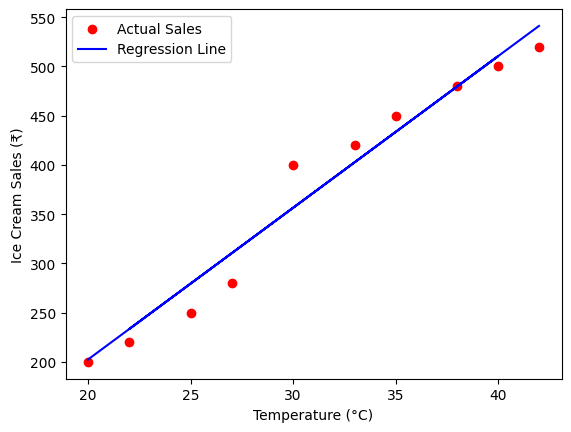

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sample dataset: Temperature (°C) vs. Ice Cream Sales (in ₹)
data = {
    'Temperature': [20, 25, 30, 35, 40, 22, 27, 33, 38, 42],
    'Sales': [200, 250, 400, 450, 500, 220, 280, 420, 480, 520]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Split dataset into input (X) and output (y)
X = df[['Temperature']]
y = df['Sales']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales for test data
y_pred = model.predict(X_test)

# Print model parameters
print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)

# Predict sales for a new temperature (e.g., 32°C)
new_temp = np.array([[32]])
predicted_sales = model.predict(new_temp)
print(f"Predicted Sales for {new_temp[0][0]}°C: ₹{predicted_sales[0]:.2f}")

# Visualization
plt.scatter(X, y, color='red', label='Actual Sales')
plt.plot(X, model.predict(X), color='blue', label='Regression Line')
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (₹)")
plt.legend()
plt.show()


# week 3

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

# Sample dataset: Weather conditions and whether to play outside
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numerical using label encoding
df_encoded = df.apply(lambda x: x.astype('category').cat.codes)

# Split features and target variable
X = df_encoded.drop(columns=['Play'])  # Features
y = df_encoded['Play']  # Target variable

# Train Decision Tree using ID3 algorithm (Entropy)
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

# Display the decision tree structure
tree_rules = export_text(model, feature_names=X.columns.tolist())
print("Decision Tree Structure:\n", tree_rules)

# Classify a new sample: Outlook=Sunny, Temperature=Cool, Humidity=High, Windy=False
new_sample = pd.DataFrame({'Outlook': ['Sunny'], 'Temperature': ['Cool'], 'Humidity': ['High'], 'Windy': ['False']})
new_sample_encoded = new_sample.apply(lambda x: x.astype('category').cat.codes)
prediction = model.predict(new_sample_encoded)

# Display prediction
print(f"\nPredicted Class for new sample {new_sample.values[0]}: {'Yes' if prediction[0] == 1 else 'No'}")


Decision Tree Structure:
 |--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Windy <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Windy >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- Windy >  0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1


Predicted Class for new sample ['Sunny' 'Cool' 'High' 'False']: Yes


In [9]:
import numpy as np
import pandas as pd
from collections import Counter

# Sample dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Function to calculate entropy
def entropy(y):
    freq = np.bincount(y)
    prob = freq / len(y)
    return -np.sum([p * np.log2(p) for p in prob if p > 0])

# Function to split dataset based on an attribute
def split_data(df, attribute, value):
    return df[df[attribute] == value].drop(columns=[attribute])

# Function to build the decision tree
def id3(df, target):
    target_values = df[target].values
    if len(set(target_values)) == 1:
        return target_values[0]  # If all values are same, return the class
    
    if len(df.columns) == 1:
        return Counter(target_values).most_common(1)[0][0]  # Return most common class
    
    # Calculate information gain for each attribute
    gains = {}
    for col in df.columns[:-1]:  # Exclude target column
        unique_values = df[col].unique()
        total_entropy = entropy(df[target].astype('category').cat.codes.values)
        split_entropy = sum(
            (len(df[df[col] == val]) / len(df)) * entropy(df[df[col] == val][target].astype('category').cat.codes.values)
            for val in unique_values
        )
        gains[col] = total_entropy - split_entropy
    
    # Select attribute with highest information gain
    best_feature = max(gains, key=gains.get)
    
    # Build tree recursively
    tree = {best_feature: {}}
    for value in df[best_feature].unique():
        subtree = id3(split_data(df, best_feature, value), target)
        tree[best_feature][value] = subtree
    
    return tree

# Build decision tree
decision_tree = id3(df, 'Play')

# Print Decision Tree in Dictionary Format
import pprint
pprint.pprint(decision_tree)


{'Outlook': {'Overcast': 'Yes',
             'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}
